# K_Means Clustering

This notebook provides an example code of deviding wine buyers into clusters based on the information about the offers they accepted. 

The general sequence of steps that we will follow is the following:

- Data manipulation
    - reading and understanding the data
- Model construction and interpretation
    - Model 1: K-Means model with a k number of cluster defined by ourselves
    - Elbow Method to decide the optimal k
    - Silhouette Method to decide the optimal k
    - Model 2: K-Meaqns model with the optimal k
- Joining final clusters to the data and exporting as an excel file
- Excel: joining the clusters with some variables describing each offer and trying to see patterns for each cluster

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scikitplot.cluster import plot_elbow_curve

In [2]:
data=pd.read_excel("Wine_data.xlsx",sheet_name="Data")

In [3]:
data.head()

,Customer_Names,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,Offer_7,Offer_8,Offer_9,...,Offer_23,Offer_24,Offer_25,Offer_26,Offer_27,Offer_28,Offer_29,Offer_30,Offer_31,Offer_32
0,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Anderson,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,Bailey,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Baker,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
data_2=data.iloc[:,1:]

In [5]:
data_2.head()

,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,Offer_7,Offer_8,Offer_9,Offer_10,...,Offer_23,Offer_24,Offer_25,Offer_26,Offer_27,Offer_28,Offer_29,Offer_30,Offer_31,Offer_32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [6]:
model1_cluster = KMeans(5,random_state=42)

In [7]:
model1_cluster.fit_predict(data_2)

array([1, 0, 4, 1, 0, 2, 4, 1, 2, 1, 2, 4, 1, 0, 1, 4, 0, 4, 1, 2, 1, 1,
       2, 2, 4, 3, 3, 0, 0, 4, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 4, 4, 1, 0,
       1, 2, 1, 1, 0, 0, 0, 3, 4, 4, 2, 1, 4, 1, 1, 0, 0, 1, 0, 1, 1, 4,
       4, 0, 2, 0, 3, 0, 2, 1, 0, 1, 4, 2, 1, 4, 3, 0, 3, 4, 1, 1, 1, 3,
       0, 1, 0, 1, 0, 1, 3, 2, 1, 3, 0, 2])

In [8]:
#let's get values of cluster centers
model1_cluster.cluster_centers_

array([[ 4.54545455e-02,  4.54545455e-02,  4.54545455e-02,
         3.18181818e-01,  9.09090909e-02,  1.81818182e-01,
         4.54545455e-02,  4.54545455e-02,  3.18181818e-01,
         4.54545455e-02,  2.72727273e-01,  4.54545455e-02,
        -3.46944695e-17, -2.77555756e-17,  4.54545455e-02,
         1.81818182e-01, -4.16333634e-17, -8.32667268e-17,
         9.09090909e-02,  2.27272727e-01,  4.54545455e-02,
         0.00000000e+00,  4.54545455e-02, -6.93889390e-17,
         1.81818182e-01,  4.54545455e-02,  1.81818182e-01,
         1.36363636e-01,  4.54545455e-02,  4.54545455e-02,
         4.09090909e-01,  1.36363636e-01],
       [-4.16333634e-17, -4.16333634e-17,  2.85714286e-02,
        -8.32667268e-17, -1.38777878e-17,  2.85714286e-02,
         4.28571429e-01,  4.57142857e-01, -4.16333634e-17,
         5.71428571e-02,  2.85714286e-02,  2.85714286e-02,
         1.71428571e-01,  2.77555756e-17, -4.16333634e-17,
        -2.08166817e-17,  0.00000000e+00,  3.71428571e-01,
        -2.08

In [9]:
#let's see Sum of squared distances of samples to their closest cluster center. The smaller the number the better
model1_cluster.inertia_

203.76651387827857

# Elbow Method

There is a method to choose optimal value of k (number of clusters). The method is called elbow method. 

In [10]:
K=range(1,11) #defining the range of the numbers of clusters out of which we want to choose the optimal k

sse={}
for k in K:
    cluster_wine=KMeans(k,random_state=42)
    cluster_wine.fit_predict(data_2)
    sse[k] = cluster_wine.inertia_ #Sum of squared distances of samples to their closest cluster center, 
                                        #other measures of distances can also be taken
        
#lets see what sse contains
sse

{1: 281.90000000000003,
 2: 251.46031746031744,
 3: 228.3105506822612,
 4: 216.95436507936506,
 5: 203.76651387827857,
 6: 195.38591269841268,
 7: 187.12400779045515,
 8: 178.82063492063492,
 9: 171.77997835497837,
 10: 164.792316017316}

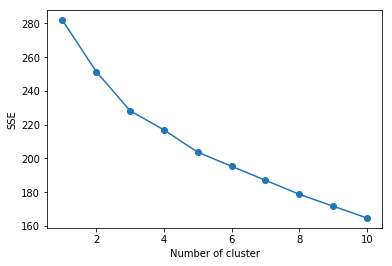

In [11]:
#let's visualize SSE values for 10 values of k - Elbow Curve
plt.figure()
plt.plot(sse.keys(),sse.values(), marker="o") #sse is dictionary 
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# Now let's just use <code>plot_elbow_curve()</code> function to plot elbow curve!

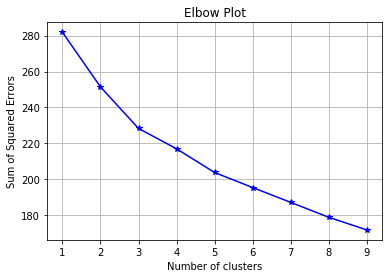

In [12]:
plot_elbow_curve(KMeans(random_state=42),data_2,cluster_ranges=range(1,10),show_cluster_time=False)
plt.show()

<b>It seems that 4 is an optimal value for k. However as the elbow plot is not broken enough at that point, it's difficult to choose optimal k from this elbow plot.</b>

# Silhouette score method

    Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b).

In [13]:
np.random.seed(42)

sil_coef={}
for k in range (2,10): 
    cluster_wine=KMeans(k)
    cluster_wine.fit_predict(data_2)
    sil_coef[k]=silhouette_score(data_2,cluster_wine.labels_,metric='euclidean')

#Higher Silhouette Coefficient score relates to a model with better defined clusters
sil_coef

{2: 0.09174871508750351,
 3: 0.1124017526599717,
 4: 0.12686844766649183,
 5: 0.10983457135098874,
 6: 0.11862276260442343,
 7: 0.11389004516301761,
 8: 0.11916975189111405,
 9: 0.12301380394403673}

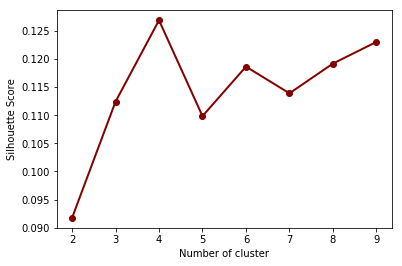

In [14]:
plt.figure()
plt.plot(sil_coef.keys(),sil_coef.values(), color='#840101',linewidth=2,marker='o') #sse is dictionary, plotting 
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

# Final Model based on the optimal K

In [15]:
#let's add cluster labels to our original data
cluster_final=KMeans(4,random_state=42)
data["cluster_final"]=cluster_final.fit_predict(data_2)

In [16]:
data.head()

,Customer_Names,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,Offer_7,Offer_8,Offer_9,...,Offer_24,Offer_25,Offer_26,Offer_27,Offer_28,Offer_29,Offer_30,Offer_31,Offer_32,cluster_final
0,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,3
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,Anderson,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,2
3,Bailey,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,3
4,Baker,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
# quickly count the number of customers in each cluster
data.cluster_final.value_counts()

0    36
1    28
3    20
2    16
Name: cluster_final, dtype: int64

<b> The biggest cluster is the first one (with label 0). </b>

In [18]:
#saving the data into excel (now data includes the labels of clusters for each observation)
data.to_excel('clusters.xlsx')